# Notebook 2 Exercises 

by [Sergio Castelblanco](http://www.linkedin.com/in/sergio-castelblanco/) -- [Jhon Gonzalez](http://linkedin.com/in/jhon-franklin-gonzalez-gamboa-b6123230/)


version 2.0, June 20 2018

# Exercise 00

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [185]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [186]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

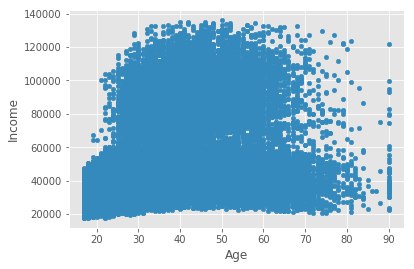

In [187]:
income.plot(x='Age', y='Income', kind='scatter')

Not exist any related between income and Age

In [188]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

clf1 = LinearRegression()

In [252]:
X=income['Age'].reshape(-1, 1)
y=income['Income'].reshape(-1, 1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [253]:
clf1.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [254]:
print('Coefficients Beta: \n', clf1.coef_)

Coefficients Beta: 
 [[ 542.16765707]]


To each increase in the Age the income increase is 542 times

In [255]:
y_pred_30 = clf1.predict(30)
#print(y)
print("Prediction 30 years=",y_pred_30)
#y_pred_30.shape

y_pred_40 = clf1.predict(40)
#print(y)
print("Prediction 40 years=",y_pred_40)
#y_pred_40.shape

Prediction 30 years= [[ 48803.11784304]]
Prediction 40 years= [[ 54224.79441376]]


# Exercise 2.2
Evaluate the model using the MSE

In [256]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=.2)
print(X_train.shape)
print(y_test.shape)

(26048, 1)
(6513, 1)


In [257]:
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
print(y_pred)
y_pred.shape

[[ 66266.569605  ]
 [ 42424.52849876]
 [ 46217.58049293]
 ..., 
 [ 51636.2261989 ]
 [ 48926.90334592]
 [ 60847.92389903]]


(6513, 1)

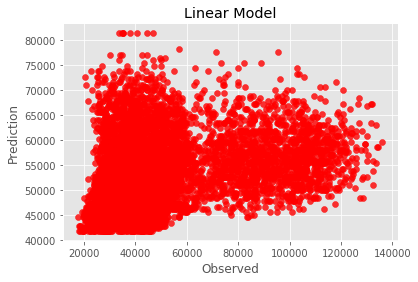

In [258]:
alpha = plt.figure()
plt.scatter(y_test, y_pred, alpha=.8,c="red")
plt.title("Linear Model")
plt.ylabel("Prediction")
plt.xlabel("Observed")
plt.show()

[598968970.03028524, 606969111.24547958, 583459999.42524779, 604789353.28602886, 597308030.28965044, 601922033.37629521, 581457194.14423943, 602098053.40453851, 602766017.13421285, 593120876.62438226, 601207972.28757966, 593893860.7349745, 589205497.51302183, 597826259.87228465, 598236002.8918221, 607323049.11040461, 598267996.26553369, 601397015.87352681, 594992839.90552819, 592573382.30773425, 589496810.70374751, 598728928.36799121, 604455756.18702531, 576679835.84000719, 618763665.21243489, 592566379.27246702, 589326441.39136207, 592963218.5262723, 597135401.69942653, 609188419.00092864, 596959565.67042375, 608404865.85394096, 609192382.9506048, 576852951.63171697, 591866310.50320423, 576299214.64701033, 586401927.6992718, 594277553.21178067, 590350133.70244396, 593366445.57817245, 595205528.00939667, 606054137.30787408, 596917563.95691502, 581225946.30684006, 606400374.8973552, 614611743.27101946, 595232833.43609476, 581777973.03913856, 591170837.05621254, 574639841.70227122, 59764

count    1.000000e+02
mean     5.945276e+08
std      1.006031e+07
min      5.746398e+08
25%      5.893039e+08
50%      5.955000e+08
75%      6.009086e+08
max      6.187637e+08
dtype: float64

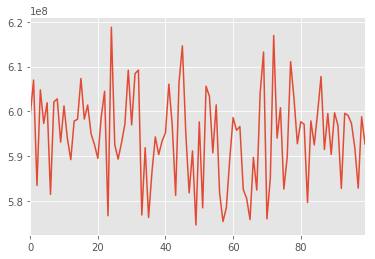

In [260]:
MSE=[]
for i in range(100):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3*i,test_size=.2)

    # train a logistic regression model
    clf1 = LinearRegression()
    clf1.fit(X_train, y_train)

    # make predictions for testing set
    y_pred = clf1.predict(X_test)

    # calculate testing accuracy
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
print(MSE)
pd.Series(MSE).plot()
print('Coefficients Beta: \n', clf1.coef_)
pd.Series(MSE).describe()


# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [216]:
import math
income['Age2']=np.square(income[('Age')])
print(income[('Age2')])

0        1521
1        2500
2        1444
3        2809
4         784
5        1369
6        2401
7        2704
8         961
9        1764
10       1369
11        900
12        529
13       1024
14       1600
15       1156
16        625
17       1024
18       1444
19       1849
20       1600
21       2916
22       1225
23       1849
24       3481
25       3136
26        361
27       2916
28       1521
29       2401
         ... 
32531     900
32532    1156
32533    2916
32534    1369
32535     484
32536    1156
32537     900
32538    1444
32539    5041
32540    2025
32541    1681
32542    5184
32543    2025
32544     961
32545    1521
32546    1369
32547    1849
32548    4225
32549    1849
32550    1849
32551    1024
32552    1849
32553    1024
32554    2809
32555     484
32556     729
32557    1600
32558    3364
32559     484
32560    2704
Name: Age2, Length: 32561, dtype: int64


In [261]:
feature_cols = ['Age2', 'Age']
X = income[feature_cols]
y=income['Income'].reshape(-1, 1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


[543697160.24783075, 555890841.74290645, 521576883.79460567, 547455808.08823991, 544799407.14488399, 533968541.5760116, 537936809.98059106, 534868433.58733898, 554608986.55499482, 547490287.83351243, 547627651.9829495, 523461639.61071682, 539674809.89121342, 535191320.56494105, 558065064.92418408, 550588798.89852059, 534243693.8891325, 543935928.05296421, 545244339.30723846, 539343677.79857385, 529994788.45809102, 529785690.25862789, 534018896.05537057, 536688345.75091004, 546029112.65871656, 542931475.50363994, 534717354.39895564, 550300063.69639778, 546713790.74466407, 544671015.13028347, 550614091.42642331, 544752930.61238515, 547995019.82065475, 538334501.52106476, 550923139.15498507, 553003725.01159775, 552169779.31327248, 540262443.59875262, 534840705.75521106, 552804485.73149788, 539542736.35169244, 555380418.61665452, 549768756.32251763, 551909961.9919548, 559748565.64899111, 551920412.65247536, 551483854.60930812, 535988055.43956184, 535820730.1028505, 544703767.30870366, 5375

count    1.000000e+02
mean     5.442218e+08
std      8.295156e+06
min      5.215769e+08
25%      5.382422e+08
50%      5.440211e+08
75%      5.505951e+08
max      5.629753e+08
dtype: float64

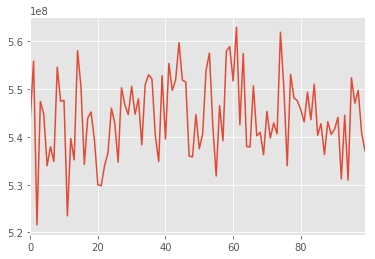

In [262]:
MSE=[]
for i in range(100):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10*i,test_size=.2)

    # train a logistic regression model
    clf1 = LinearRegression()
    clf1.fit(X_train, y_train)

    # make predictions for testing set
    y_pred = clf1.predict(X_test)

    # calculate testing accuracy
    MSE.append(metrics.mean_squared_error(y_test, y_pred))

print(MSE)
pd.Series(MSE).plot()
print('Coefficients Beta: \n', clf1.coef_)
pd.Series(MSE).describe()

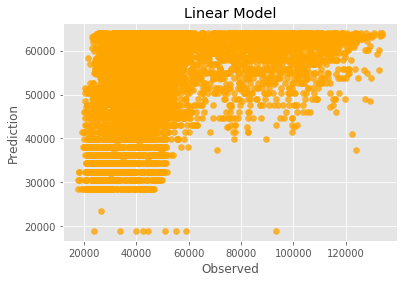

In [235]:
alpha = plt.figure()
plt.scatter(y_test, y_pred, alpha=.8,c="orange")
plt.title("Linear Model")
plt.ylabel("Prediction")
plt.xlabel("Observed")
plt.show()

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [98]:
income

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,36347.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,24362.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,108554.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,88681.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,108863.0


In [120]:
# check for missing values
income.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Income               0
dtype: int64

In [127]:
income_missing = income.dropna()
income_missing.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Income            0
dtype: int64

In [128]:
income_missing.shape

(30162, 15)

In [133]:
income_Workclass = pd.get_dummies(income['Workclass'])
income_Education = pd.get_dummies(income['Education'])
income_Occupation = pd.get_dummies(income['Occupation'])
income_Marital = pd.get_dummies(income['Martial Status'])
income_Race = pd.get_dummies(income['Race'])
income_Sex = pd.get_dummies(income['Sex'])

In [293]:
income_final = income_missing.join(income_Workclass)
income_final = income_final.join(income_Education)
income_final = income_final.join(income_Occupation)
income_final = income_final.join(income_Marital)
income_final = income_final.join(income_Race)
income_final = income_final.join(income_Sex)
income_final.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Federal-gov,Local-gov,Never-worked,...,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.00000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,54011.688515,0.031265,0.068530,0.0,...,0.322459,0.031132,0.027419,0.009482,0.029673,0.093396,0.007659,0.85979,0.324315,0.675685
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,25598.249210,0.174035,0.252657,0.0,...,0.467425,0.173677,0.163303,0.096915,0.169687,0.290991,0.087179,0.34721,0.468126,0.468126
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,17636.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,35836.250000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,45383.500000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,66422.500000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,136063.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [238]:
income_final.describe()
income_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 68 columns):
Age                      30162 non-null int64
Workclass                30162 non-null object
fnlwgt                   30162 non-null int64
Education                30162 non-null object
Education-Num            30162 non-null int64
Martial Status           30162 non-null object
Occupation               30162 non-null object
Relationship             30162 non-null object
Race                     30162 non-null object
Sex                      30162 non-null object
Capital Gain             30162 non-null int64
Capital Loss             30162 non-null int64
Hours per week           30162 non-null int64
Country                  30162 non-null object
Income                   30162 non-null float64
Federal-gov              30162 non-null uint8
Local-gov                30162 non-null uint8
Never-worked             30162 non-null uint8
Private                  30162 non-null uint8
Self-em

dtype('O')

In [241]:
income_final["Martial Status"].describe

<bound method NDFrame.describe of 0                Never-married
1           Married-civ-spouse
2                     Divorced
3           Married-civ-spouse
4           Married-civ-spouse
5           Married-civ-spouse
6        Married-spouse-absent
7           Married-civ-spouse
8                Never-married
9           Married-civ-spouse
10          Married-civ-spouse
11          Married-civ-spouse
12               Never-married
13               Never-married
15          Married-civ-spouse
16               Never-married
17               Never-married
18          Married-civ-spouse
19                    Divorced
20          Married-civ-spouse
21                   Separated
22          Married-civ-spouse
23          Married-civ-spouse
24                    Divorced
25          Married-civ-spouse
26               Never-married
28                    Divorced
29          Married-civ-spouse
30               Never-married
31               Never-married
                 ...          
32526

In [349]:
feature_cols = ['Age',"fnlwgt","Male","White","Capital Gain","Capital Loss","Hours per week","Married-civ-spouse","Divorced","Never-married"]
X = income_final[feature_cols]
y=income_final['Income'].reshape(-1, 1)

[407356467.35875666, 401004699.26220936, 410677405.64774311, 412787286.92524272, 411428952.4574461, 411624357.53635293, 396327456.74835235, 408470672.27977252, 406997244.66893083, 402558574.33825886, 404271855.73310947, 410853087.77446514, 419262092.31415892, 408047438.26909435, 418163995.08211839, 410847814.9220435, 411786412.89335662, 419699319.84092486, 408941577.33600605, 402934090.74312443, 392364538.02808487, 399123176.48622972, 407631450.17098963, 407453499.91322112, 398979748.04825228, 398226510.60273516, 398671394.48190671, 408232372.91873568, 410866442.66381109, 386416825.77198035, 403508526.57295585, 407086581.21587616, 400710302.15013957, 421680368.12816197, 402924838.4862076, 419066495.62069029, 390735937.52266651, 404982304.95922983, 391092568.95908636, 392325605.12910503, 397372535.94546497, 404375615.24353719, 404294200.79812074, 404184504.65663266, 415905462.72472787, 407998795.97456986, 407477337.24408549, 410426791.97721612, 409974610.11929017, 399925867.81433547, 41

count    2.000000e+02
mean     4.046936e+08
std      7.958030e+06
min      3.825171e+08
25%      3.992160e+08
50%      4.049966e+08
75%      4.099172e+08
max      4.224382e+08
dtype: float64

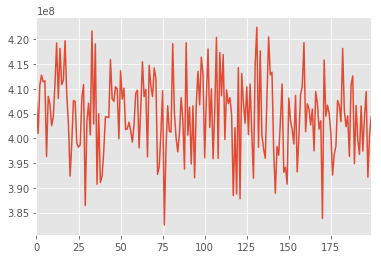

In [350]:
MSE=[]
for i in range(200):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20*i,test_size=.2)

    # train a linear regression model
    clf1 = LinearRegression()
    clf1.fit(X_train, y_train)

    # make predictions for testing set
    y_pred = clf1.predict(X_test)

    # calculate testing accuracy
    MSE.append(metrics.mean_squared_error(y_test, y_pred))

print(MSE)
pd.Series(MSE).plot()
print('Coefficients Beta: \n', clf1.coef_)
pd.Series(MSE).describe()

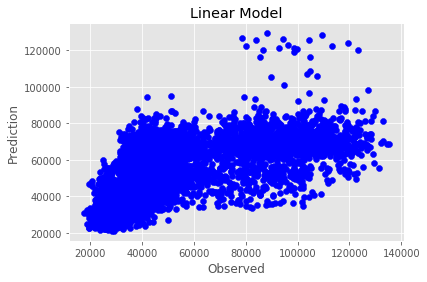

In [245]:
# Plot outputs
plt.scatter(y_test,y_pred,  color='blue')
plt.title("Linear Model")
plt.ylabel("Prediction")
plt.xlabel("Observed")
plt.show()

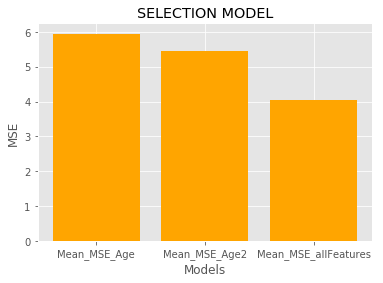

In [290]:
fig = plt.figure()
plt.bar(["Mean_MSE_Age","Mean_MSE_Age2","Mean_MSE_allFeatures"],[5.94527,5.442218,4.046936],color="orange",align='center')
plt.title("SELECTION MODEL")
plt.xlabel("Models",fontsize=12)
plt.ylabel("MSE")
plt.show()
fig.savefig('test.jpg')

In the last plot we can see that the MSE_Age is higher than MSE with others features, in this case the best model is the that has less MSE

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [305]:
income_final['isUS'] = (income_final['Country'] == 'United-States')*1.0
income_final['isUS'].value_counts()

1.0    27504
0.0     2658
Name: isUS, dtype: int64

In [336]:
from IPython.display import HTML
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
income_final
del income_final['Workclass']
del income_final['Occupation']
del income_final['Martial Status']
del income_final['Relationship']
del income_final['Race']
del income_final['Sex']
del income_final['Country']


,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,isUS
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.0,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.00000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,54011.688515,0.031265,0.068530,0.0,0.738877,0.035608,0.082853,0.042404,0.000464,0.027187,0.034746,0.012499,0.005006,0.009548,0.018467,0.015085,0.033420,0.043333,0.167230,0.012433,0.326238,0.053942,0.001492,0.017970,0.221404,0.123367,0.000298,0.133612,0.132352,0.032790,0.044758,0.065181,0.106492,0.004741,0.133877,0.021351,0.118825,0.030237,0.052119,0.139712,0.000696,0.466315,0.012267,0.322459,0.031132,0.027419,0.009482,0.029673,0.093396,0.007659,0.85979,0.324315,0.675685,0.911876
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,25598.249210,0.174035,0.252657,0.0,0.439254,0.185313,0.275664,0.201513,0.021540,0.162629,0.183138,0.111101,0.070579,0.097250,0.134635,0.121894,0.179732,0.203608,0.373188,0.110809,0.468843,0.225907,0.038597,0.132843,0.415199,0.328864,0.017272,0.340240,0.338879,0.178088,0.206776,0.246850,0.308471,0.068693,0.340526,0.144555,0.323588,0.171241,0.222270,0.346694,0.026378,0.498872,0.110077,0.467425,0.173677,0.163303,0.096915,0.169687,0.290991,0.087179,0.34721,0.468126,0.468126,0.283480
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,17636.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,35836.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,45383.500000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [337]:
income_final

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,isUS
0,39,77516,13,2174,0,40,51806.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1.0
1,50,83311,13,0,0,13,68719.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
2,38,215646,9,0,0,40,51255.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0
3,53,234721,7,0,0,40,47398.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1.0
4,28,338409,13,0,0,40,30493.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0.0
5,37,284582,14,0,0,40,36347.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1.0
6,49,160187,5,0,0,16,24362.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.0
7,52,209642,9,0,0,45,108554.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0
8,31,45781,14,14084,0,50,88681.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1.0
9,42,159449,13,5178,0,40,108863.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1.0


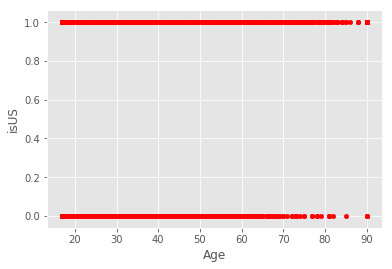

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.scatter(income_final["Age"],income_final['isUS'])
# scatter plot using Pandas
income_final.plot(kind='scatter', x="Age", y='isUS',color="red")

In [361]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
#data.iloc[:,68]
#feature_cols1 = ['Age',"fnlwgt","Male","White","Capital Gain","Capital Loss","Hours per week"]
#feature_cols = ['Age',"fnlwgt","Male","White","Capital Gain","Capital Loss","Hours per week","Married-civ-spouse","Divorced","Never-married"]
#X = income_final[feature_cols]
X = income_final.iloc[:,1:59]
y = income_final['isUS']

In [362]:
#MODEL FUNCTION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image


from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm,dtrain_x,dtrain_y,dtest_x,dtest_y,of_type):
    
    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(dtrain_x,dtrain_y)
    predictions = algorithm.predict(dtest_x)
    
    print (algorithm)
    print ("\naccuracy_score :",accuracy_score(dtest_y,predictions))
    
    print ("\nclassification report :\n",(classification_report(dtest_y,predictions)))
        
    plt.figure(figsize=(14,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)
    
    if  of_type == "feat":
        
        dataframe = pd.DataFrame(algorithm.feature_importances_,dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.0011,i,j,weight = "bold")
    
    elif of_type == "coef" :
        
        dataframe = pd.DataFrame(algorithm.coef_.ravel(),dtrain_x.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")
            
    elif of_type == "none" :
        return (algorithm)
    
    


In [358]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = income_final.iloc[:,1:59]
y = income_final['isUS']


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

Add  5th-6th                        with p-value 0.0
Add  Asian-Pac-Islander             with p-value 0.0
Add  1st-4th                        with p-value 7.23272e-230
Add  Other                          with p-value 2.5265e-128
Add  fnlwgt                         with p-value 2.54182e-66
Add  Married-spouse-absent          with p-value 1.73075e-50
Add  Preschool                      with p-value 3.50684e-40
Add  9th                            with p-value 5.20637e-40
Add  7th-8th                        with p-value 1.49863e-40
Add  Priv-house-serv                with p-value 3.1924e-14
Add  Other-service                  with p-value 3.39332e-11
Add  Machine-op-inspct              with p-value 1.66974e-09
Add  Doctorate                      with p-value 7.65526e-09
Add  Private                        with p-value 6.46717e-07
Add  Divorced                       with p-value 1.58889e-06
Add  Transport-moving               with p-value 4.29134e-06
Add  12th                           with

In [359]:
X = income_final[result]
y = income_final['isUS']

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

accuracy_score : 0.911155312448

classification report :
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       536
        1.0       0.91      1.00      0.95      5497

avg / total       0.83      0.91      0.87      6033



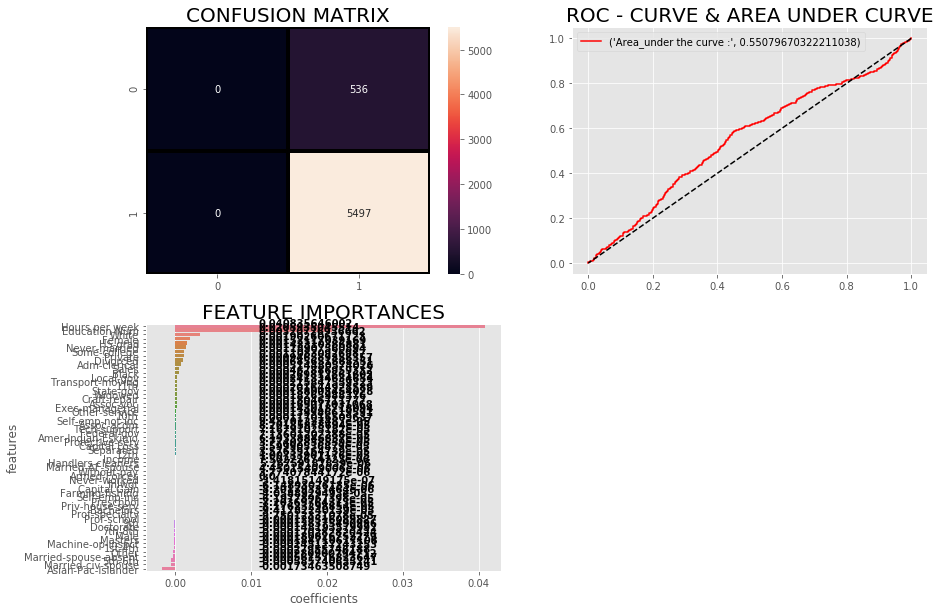

In [363]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20*i,test_size=.2)

# train a logistic regression model
model(log,X_train,y_train,X_test,y_test,"coef")